In [1]:
# Link: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

# Processing data
#### 1. read in the CSV and convert to errays
#### 2. split dataset into input features and the label
#### 3. scale the data so that input features have similar orders of magnitude
#### 4. split dataset into training set, validation set, and test set

In [2]:
import pandas as pd

# read in the dataset's file
df = pd.read_csv('housepricedata.csv')

# input features (1st 10 columns): lot areas, overall quality, overall condition, total basement area, # of full bathrooms, # of half bathrooms, # of bedrooms above ground, total # of rooms above ground, # of fireplaces, garage area
# the feature being predicted is the last column: above median price (1 = yes, 0 = no)

# convert the data into arrays so that it can be processed
dataset = df.values

# split the dataset into input features (X) and the feature being predicted (Y)
    # X: assign 1st 10 columns of the array to X
    # Y: assign last column of array to Y
X = dataset[:,0:10] # everything before the comma = rows of the array, everything after comma = columns of the arrays
    # because you don't want to split the rows, putting : before the comma means "take all the rows in the dataset and put it in X"
    # then to get the first 10 columns, the 0:10 after the comma means take columns 0-9 and put it in X
Y = dataset[:,10]

# make sure scale of input features (X) are similar
    # lot area --> thousands, overall quality --> 1-10, fireplaces --> 0-2
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() # min_max scaler scales the dataset so all input features are between 0-1 (inclusive)
X_scale = min_max_scaler.fit_transform(X) # scaled dataset is in the array X_scale

# split dataset into training set, validation set, and test set
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
    # val_and_test size will be 30% of overall dataset
    # store split data into first 4 variables on the left
    # problem: only split dataset into 2
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
    # splits the val_and_test size equally to validation and test sets

# six variables representing the dataset
    # X_train (10 input features, 70% of full dataset)
    # X_val (10 input features, 15% of full dataset)
    # X_test (10 input features, 15% of full dataset)
    # Y_train (1 label, 70% of full dataset)
    # Y_val (1 label, 15% of full dataset)
    # Y_test (1 label, 15% of full dataset)

# to see shapes of the arrays:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
    # training set has 1022 data points, validation and test sets only have 219 each
    # X variables have 10 input features, Y only has 1 feature to predict

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and training the neural network
#### 1. specify the architecture
#### 2. find the best numbers from the data to fill it in

In [3]:
# setting up the architecture
    # Hidden layer 1: 32 neurons, ReLU activation
    # Hidden layer 2: 32 neurons, ReLU activation
    # Output layer: 1 neuron, Sigmoid activation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), # 1st layer = dense (fully connected) layer with 32 neurons, ReLU activation, and input shape of 10 (10 input features)
    Dense(32, activation='relu'), # 2nd layer = dense layer with 32 neurons, ReLU activation, no input shape needs to be defined bc Keras infers it from the output of the first layer
    Dense(1, activation='sigmoid'), # 3rd layer = dense layer with 1 neuron, sigmoid activation
])

# filling in the best numbers
    # deterimine the optimization algorithm, loss function, other metrics to track
model.compile(optimizer='sgd', # stochastic gradient descent
              loss='binary_crossentropy', # loss function for outputs that are either 0 or 1
              metrics=['accuracy'])

In [4]:
# training the model on the data
hist = model.fit(X_train, Y_train, # X_train and Y_train are the data it's being trained on
          batch_size=32, epochs=100, # batch_size - size of the mini-batch, epochs is how long you're training for
          validation_data=(X_val, Y_val)) # specifying validation data means that the model will share how it's doing on the validation data at each point

Epoch 1/100
32/32 [==============================] - 2s 41ms/step - loss: 0.7045 - accuracy: 0.4450 - val_loss: 0.6999 - val_accuracy: 0.3790
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.2977 - val_loss: 0.6962 - val_accuracy: 0.3790
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4522 - val_loss: 0.6931 - val_accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5142 - val_loss: 0.6904 - val_accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5286 - val_loss: 0.6878 - val_accuracy: 0.4886
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5019 - val_loss: 0.6852 - val_accuracy: 0.4932
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5097 - val_loss: 0.6825 - val_accuracy: 0.4932
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8477 - val_loss: 0.3977 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8748 - val_loss: 0.3921 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8514 - val_loss: 0.3869 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8546 - val_loss: 0.3822 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8762 - val_loss: 0.3772 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8649 - val_loss: 0.3739 - val_accuracy: 0.8493
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8579 - val_loss: 0.3689 - val_accuracy: 0.8584
Epoch 

# Evaluating the final model

In [5]:
model.evaluate(X_test, Y_test)[1] # Needs [1] becase the function returns the loss as the first eleemnt and accuracy as the second
    # to only get the accuracy, access the second element through [1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8950


0.8949771523475647

# Visualizing loss and accuracy

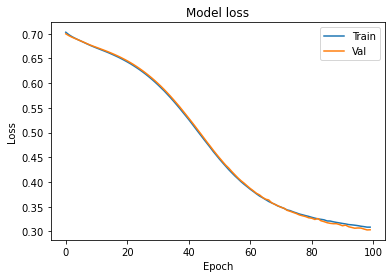

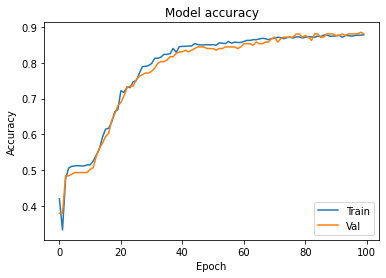

In [6]:
import matplotlib.pyplot as plt

# to visualize the training loss and validation loss
plt.plot(hist.history['loss']) # specifies you want to plot loss
plt.plot(hist.history['val_loss']) # specifies you want to plot val_loss
plt.title('Model loss') # specifies totile of the graph
plt.ylabel('Loss') # specifies x axis is Loss
plt.xlabel('Epoch') # specifies y axis is Epoch
plt.legend(['Train', 'Val'], loc='upper right') # creates legend for graph in the upper right
plt.show() # display the graph

# to visualize the training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()